# **“Titanic: Machine Learning from Disaster”**

**1. Tổng quan dữ liệu:**

Bộ dữ liệu Titanic được thu thập từ cuộc thi nổi tiếng “Titanic: Machine Learning from Disaster” trên nền tảng Kaggle.

Tập dữ liệu bao gồm 891 bản ghi (hành khách) và 12 thuộc tính mô tả thông tin cá nhân, vé tàu và kết quả sống sót.

Mục tiêu là xây dựng mô hình phân loại nhị phân dự đoán khả năng sống sót của hành khách dựa trên các đặc trưng liên quan.

→ Phân loại nhị phân (Binary Classification)

Survived = 1: Sống sót
Survived = 0: Không sống sót

Độ đo (metric):
→ Độ chính xác (Accuracy)


**2. Mục tiêu bài toán:**

Đầu vào (Input): thông tin chi tiết của từng hành khách, bao gồm nhân dạng, độ tuổi, giới tính, hạng vé, số người thân đi cùng, số vé, giá vé và cảng khởi hành.

Đầu ra (Output): biến nhị phân Survived (1 nếu hành khách sống sót, 0 nếu tử vong).

**3. Load dữ liệu:**

In [13]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [14]:
# Đọc dữ liệu huấn luyện
train = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/train.csv")

In [15]:
# Kích thước và các cột
print("Kích thước dữ liệu:", train.shape)
print("\nTên các cột:\n", train.columns.tolist())

Kích thước dữ liệu: (891, 12)

Tên các cột:
 ['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']


Dữ liệu gồm:

Số dòng: 891 (mỗi dòng là một hành khách)

Số cột: 12 thuộc tính

Mô tả chi tiết các thuộc tính:
| Tên thuộc tính  | Kiểu dữ liệu | Giải thích ý nghĩa                                                                                       |
| --------------- | ------------ | -------------------------------------------------------------------------------------------------------- |
| **PassengerId** | int64          | Mã định danh của hành khách (chỉ dùng để nhận dạng, không ảnh hưởng đến kết quả dự đoán).                |
| **Survived**    | int64    | Kết quả sống sót (nhãn cần dự đoán): 1 = sống sót, 0 = tử vong.                                          |
| **Pclass**      | int64    | Hạng vé: 1 = hạng nhất, 2 = hạng nhì, 3 = hạng ba (phản ánh mức kinh tế, ảnh hưởng đến cơ hội sống sót). |
| **Name**        | object        | Họ tên hành khách (có thể trích xuất thêm thông tin như danh xưng Mr., Mrs., Miss,...).                  |
| **Sex**         | object        | Giới tính: male hoặc female.                                                                             |
| **Age**         | float        | Tuổi của hành khách                                                           |
| **SibSp**       | int          | Số anh chị em/vợ chồng đi cùng trên tàu.                                                                 |
| **Parch**       | int          | Số cha mẹ/con cái đi cùng trên tàu.                                                                      |
| **Ticket**      | object        | Mã số vé tàu.                                           |
| **Fare**        | float        | Giá vé (liên quan đến hạng vé và khả năng sống sót).                                                     |
| **Cabin**       | object        | Mã số phòng .                                                            |
| **Embarked**    | object        | Cảng lên tàu: C = Cherbourg, Q = Queenstown, S = Southampton.                       |


**4. Khám phá dữ liệu:**

In [16]:
# Hiển thị 5 dòng đầu
display(train.head())

# Kiểm tra kiểu dữ liệu và số lượng giá trị null
print("\nThông tin dữ liệu:")
print(train.info())

print("\nSố lượng giá trị thiếu:")
print(train.isnull().sum())

# Thống kê mô tả
train.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S



Thông tin dữ liệu:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None

Số lượng giá trị thiếu:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabi

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Dooley, Mr. Patrick",male,NaN,NaN,NaN,347082,NaN,G6,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


**5. Đánh giá tổng quan chất lượng dữ liệu:**
- Biến mục tiêu Survived là dữ liệu nhị phân (0 – tử vong, 1 – sống sót), với tỷ lệ sống sót trung bình khoảng 38,38%, phản ánh thực tế rằng phần lớn hành khách trên tàu không qua khỏi.

- Hành khách có độ tuổi trung bình khoảng 29,7 tuổi, dao động khá rộng (từ 0,42 đến 80 tuổi), cho thấy độ đa dạng cao về độ tuổi.

- Giới tính (Sex) là yếu tố có ảnh hưởng rõ rệt đến khả năng sống sót. Trong tập dữ liệu, nam giới chiếm đa số (577 người, khoảng 65%), nhưng nữ giới lại có tỷ lệ sống sót cao hơn đáng kể.

- Điều kiện kinh tế – xã hội (Pclass) cũng là yếu tố quan trọng. Trung bình hành khách có hạng vé là 2,3, cho thấy đa phần thuộc hạng 3 (bình dân). Tuy nhiên, thống kê chi tiết cho thấy hành khách ở hạng 1 có tỷ lệ sống sót cao hơn rõ rệt, do họ ở gần boong tàu, có điều kiện tiếp cận xuồng cứu sinh tốt hơn so với các hạng thấp hơn.

- Giá vé (Fare) có giá trị trung bình 32,20 nhưng độ lệch chuẩn rất lớn (≈49,69), chứng tỏ sự chênh lệch đáng kể giữa các nhóm hành khách ở các hạng vé khác nhau.

- Hai biến SibSp và Parch có giá trị trung bình lần lượt là 0,52 và 0,38, cho thấy đa số hành khách đi một mình hoặc chỉ có 1 người thân đi cùng.

- Cảng khởi hành (Embarked) phổ biến nhất là Southampton (S), chiếm khoảng 72% tổng số mẫu, trong khi Cherbourg (C) và Queenstown (Q) chiếm phần nhỏ hơn.

- Đáng lưu ý, dữ liệu có một số giá trị thiếu đáng kể:

Age: 177 giá trị thiếu (~19.9%)

Cabin: 687 giá trị thiếu (~77.1%)

Embarked: 2 giá trị thiếu (~0.2%)

=> Bộ dữ liệu Titanic cung cấp tập hợp thông tin phong phú, kết hợp giữa dữ liệu định lượng và định tính, phù hợp để huấn luyện mô hình học máy nhằm dự đoán khả năng sống sót của hành khách. Tuy nhiên, việc xử lý giá trị thiếu (đặc biệt là ở các cột Age, Cabin, Embarked) cùng với chuẩn hóa các thuộc tính định lượng như Fare và Age là bước cần thiết trước khi xây dựng mô hình học máy.
Việc hiểu rõ từng đặc trưng giúp lựa chọn chiến lược tiền xử lý và kỹ thuật mã hóa phù hợp, đóng vai trò then chốt trong việc nâng cao hiệu suất mô hình.

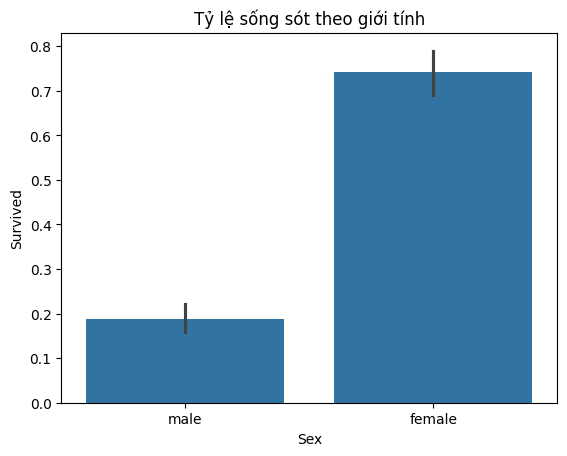

In [18]:
# Biểu đồ tỷ lệ sống sót theo giới tính
sns.barplot(x='Sex', y='Survived', data=train)
plt.title("Tỷ lệ sống sót theo giới tính")
plt.show()

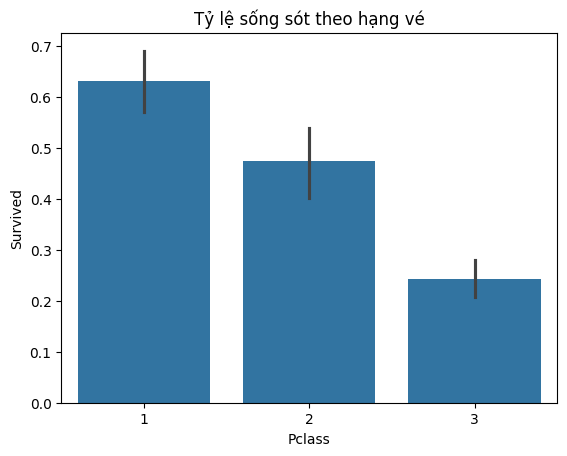

In [19]:
# Biểu đồ tỷ lệ sống sót theo hạng vé
sns.barplot(x='Pclass', y='Survived', data=train)
plt.title("Tỷ lệ sống sót theo hạng vé")
plt.show()

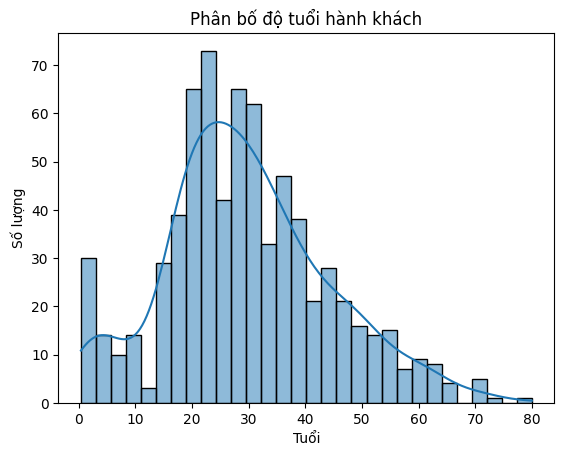

In [20]:
# Biểu đồ phân bố tuổi
sns.histplot(train['Age'].dropna(), bins=30, kde=True)
plt.title("Phân bố độ tuổi hành khách")
plt.xlabel("Tuổi")
plt.ylabel("Số lượng")
plt.show()

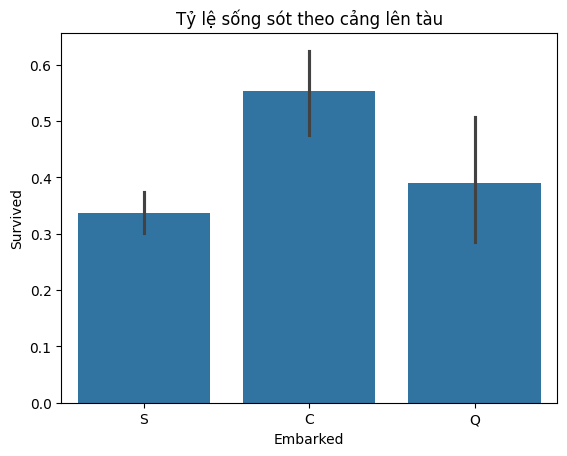

In [21]:
# Biểu đồ sống sót theo cảng lên tàu
sns.barplot(x='Embarked', y='Survived', data=train)
plt.title("Tỷ lệ sống sót theo cảng lên tàu")
plt.show()

**6. Chuẩn bị dữ liệu:**

- Xử lí dữ liệu thiếu:

In [24]:
train['Age'] = train['Age'].fillna(train['Age'].median())
train['Embarked'] = train['Embarked'].fillna(train['Embarked'].mode()[0])
train.drop(columns=['Cabin'], inplace=True, errors='ignore')

# Kiểm tra lại số lượng giá trị thiếu
print("Số lượng giá trị thiếu còn lại:\n", train.isnull().sum())

Số lượng giá trị thiếu còn lại:
 PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


- Mã hóa biến  phân loại:

In [25]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

# Mã hóa giới tính: male=1, female=0
train['Sex'] = le.fit_transform(train['Sex'])

# Mã hóa cảng khởi hành: S, C, Q -> 0, 1, 2
train['Embarked'] = le.fit_transform(train['Embarked'])


In [26]:
print("\nThông tin dữ liệu:")
print(train.info())


Thông tin dữ liệu:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    int64  
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 76.7+ KB
None


- Tạo đặc trưng mới:

In [28]:
# Tạo FamilySize = số người thân + 1 (bản thân): giúp phản ánh khả năng sinh tồn trong nhóm gia đình
train['FamilySize'] = train['SibSp'] + train['Parch'] + 1

# Tạo IsAlone = 1 nếu đi một mình, 0 nếu đi cùng: thể hiện hành khách đi một mình – nhóm này thường có khả năng sống sót thấp hơn
train['IsAlone'] = 0
train.loc[train['FamilySize'] == 1, 'IsAlone'] = 1

# Gom nhóm các danh xưng hiếm thành 'Rare'
rare_titles = ['Dr', 'Rev', 'Col', 'Major', 'Capt', 'Countess', 'Lady',
               'Sir', 'Jonkheer', 'Don', 'Dona']
train['Title'] = train['Title'].replace(rare_titles, 'Rare')

# Chuẩn hóa tên danh xưng (Miss/Mrs/Mr/Master/Rare)
train['Title'] = le.fit_transform(train['Title'])


- Chuẩn hóa đữ liệu liên tục:
Việc chuẩn hóa đưa các giá trị Age và Fare về cùng thang đo (trung bình = 0, độ lệch chuẩn = 1), giúp các mô hình như Logistic Regression, SVM hoặc KNN hoạt động hiệu quả hơn.

In [29]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
scaler = StandardScaler()
train[['Age', 'Fare']] = scaler.fit_transform(train[['Age', 'Fare']])

- Chọn đặc trưng:

In [31]:
# Các cột đặc trưng đầu vào
features = ['Pclass', 'Sex', 'Age', 'Fare', 'Embarked',
            'FamilySize', 'IsAlone', 'Title']

# Cột mục tiêu (đầu ra)
target = 'Survived'

# Tạo tập dữ liệu đầu vào và đầu ra
X = train[features]
y = train[target]

# Chia dữ liệu 80% train / 20% validation
X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Kích thước tập huấn luyện:", X_train.shape)
print("Kích thước tập kiểm thử:", X_val.shape)
print("Các đặc trưng đã sẵn sàng:\n", features)

Kích thước tập huấn luyện: (712, 8)
Kích thước tập kiểm thử: (179, 8)
Các đặc trưng đã sẵn sàng:
 ['Pclass', 'Sex', 'Age', 'Fare', 'Embarked', 'FamilySize', 'IsAlone', 'Title']
